In [48]:
from PIL import Image
import torch
from torchvision import transforms
import torchvision.models as models

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Load model
model = models.alexnet(pretrained=True)

# Load ImageNet labels
#!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [69]:
# Image pre-processing
def preprocess(img):   
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0)
    return input_batch

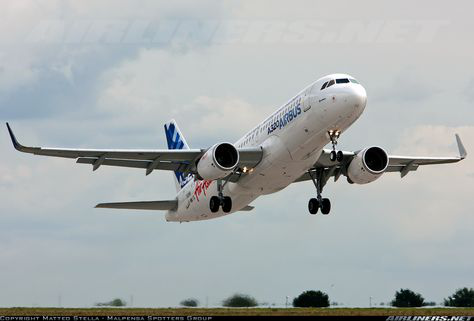

In [74]:
# Load image
name = 'airbus-airplane.jpg'
img = Image.open('data/{}'.format(name))
display(img)

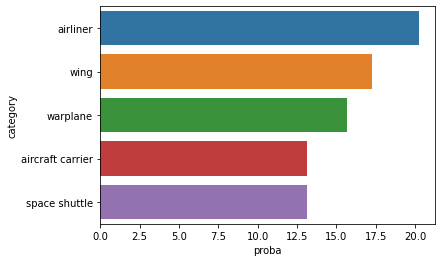

In [75]:
# Predict image class
model.eval()
out = model(preprocess(img))

k = 5
topk_prob, topk_catid = torch.topk(out, k)

result = pd.DataFrame({
    'category':[categories[int(idx)] for idx in list(topk_catid[0])],
    'proba':[float(idx) for idx in list(topk_prob[0])]
})

sns.barplot(data=result,x='proba',y='category',orient='h');